In [121]:
#importing the required libraries
import numpy as np #for linear algebra
import pandas as  pd #for data processing, CSV file
import matplotlib.pyplot as plt #for creating the plots
import seaborn as sns #for the correlationm heatmap

1. Data Exploration and Preprocessing

In [122]:
#reading the dataset
housingDataset = pd.read_csv('housing.csv')

In [123]:
#to see what we are dealing with
housingDataset.shape #shape shows what we are dealing with - there are 20640 rows and 10 columns


(20640, 10)

In [124]:
housingDataset.head() #to display the first couple of observations to see what we have

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Filling in the missing values

In [125]:
#identifying the numerical columns to be filled
numeric_columns = housingDataset.select_dtypes(include=['number']).columns

#calculating the mean for all numerical column
#this will calculate the mean(average) value for every numerical column and ignores missing data
columnMeans = housingDataset[numeric_columns].mean()

#filling in the missing values with the column means
#ths will replace the missing values in numerical columns with mean of the particular column
housing = housingDataset.fillna(columnMeans)


In [126]:
housing.info() #for better view of the data, 
#OBSERVATIONS
#districts in california - for each district there is location in terms of longitude and latitude and features about the housing such as median age, total rooms etc..
#ocean proximity is the only feature that is not numeric 
#'total_bedrooms '20433' - the only one with differerent values in comparison to others which is 20640. This means that there are 207 observations(rows) that have missing value for the total of bedrooms
#there are 207 districts, where we don't know how many total bedrooms there are 
#TWO PROBLEMS TO DEAL WITH:
#First - ocean proximity, which is not numeric - its an object. must be numeric for machine learning to work 
#Second - there are missing values - what to do where you don't know what the total number of bedrooms is and how to deal with it - FILLED IT IN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [127]:
#looking at non-numeric values - the ocean proximity
housing["ocean_proximity"].value_counts()
#value_counts to see how many non numeric variable, categorical variable look like
#OBSERVATIONS
# - there are 9136 of them that have a vlaue of <1H OCEAN - meaning it is less than one hour from ocean in terms of distance from ocean
#6551 that are INLAND
#2658 that are NEAR OCEAN
#2290 that are NEAR BAY
#5 that are ISLAND
#gives better idea of distribution of values within the column of ocean proximity
#there are 5 different categories within the categorical variable and how frequent each category is

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [128]:
#shows the descriptive statistic table of the dataset - for better understanding
#for all variable you have count, mean, standard deviation etc.. in the dataset - so providing more information
#count ist total number of rows in the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

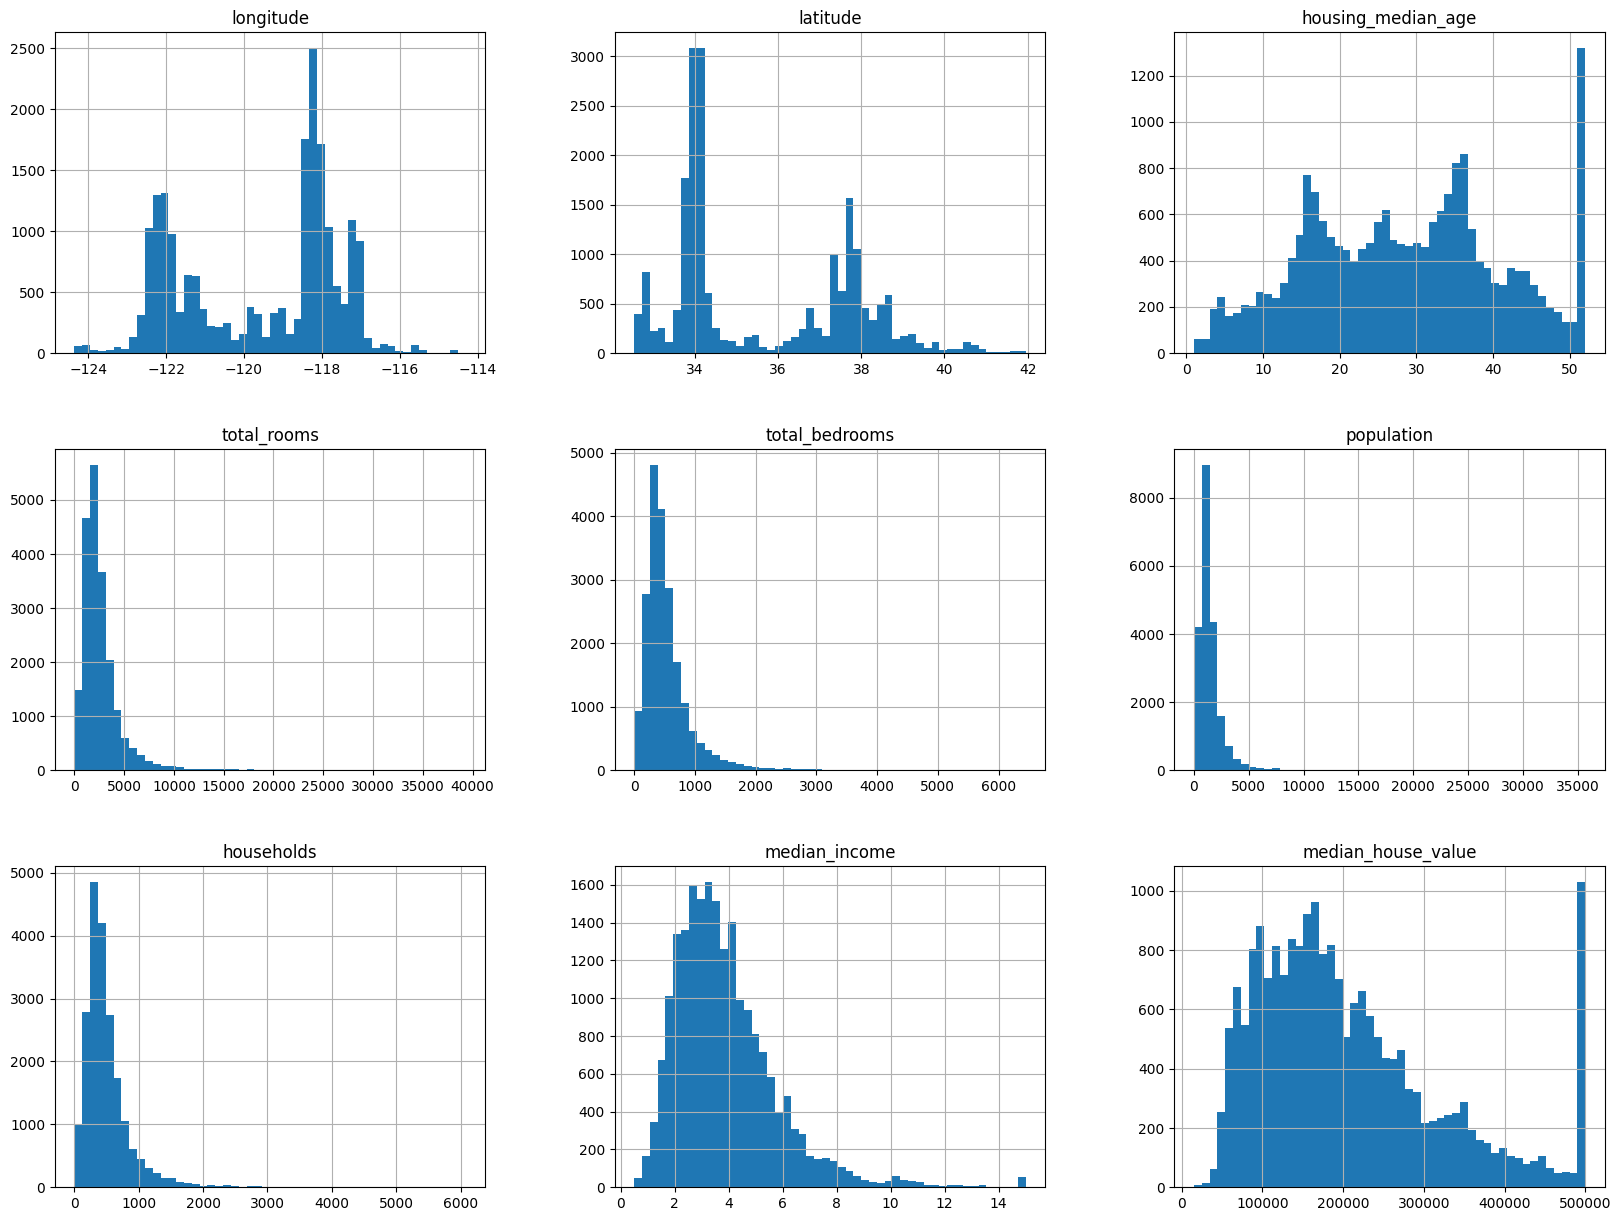

In [129]:
#plotting the data for better understanding - creating a histogram for the dataset
housing.hist(bins=50, figsize=(20,15)) # 'bins' is the chunks to split data into and figure size which is 20, 15

#shows histograms of the numerical variables in dataset that are split into 50 part(bins)
#

<Axes: xlabel='longitude', ylabel='latitude'>

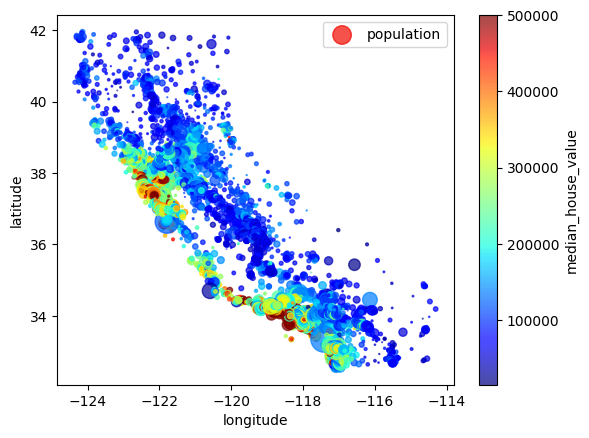

In [130]:
#plotting the data (longitude and latitude )
#adjust alpha to make the differences obvious
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.7, s=housing["population"]/100, label="population", #plotting a scattter and the x and y variable
#shows the longitude and latitude of the districts - dots representing each district, many overlaid on top of each other
#s stands for size.  size should be  whatever the population is divided by 100, therefore reducing the size
#for better transpareceny using alpha
#OBSERVATIONS 
#there are districts with relatively large size - dots adjusted based on the  size
#using colour coding for house values
#c stands for colours. colour is the median house value. colour map is going to be using the cmap option
             #using predefined colour map jet
c="median_house_value", cmap=plt.get_cmap("jet"))
#OBSERVATIONS FROM THE PLOT
#now, not only the sizes represent the population of the districts but also the colour is going is going to be corresponding to the house value
#the more expensive the house, the closer it is to the colour red, the less expensive houses is closer to the colour blue 
#in the bay area around 38 latitude, 122 longitude, has the most expensive houses
#inland around, 38 latitude, 118 longitude, the prices of houses are going to decrease
#the red dots are also large - large districts that have high population and are near the bay, have the highest median house value - so more pricey

One-hot enconding

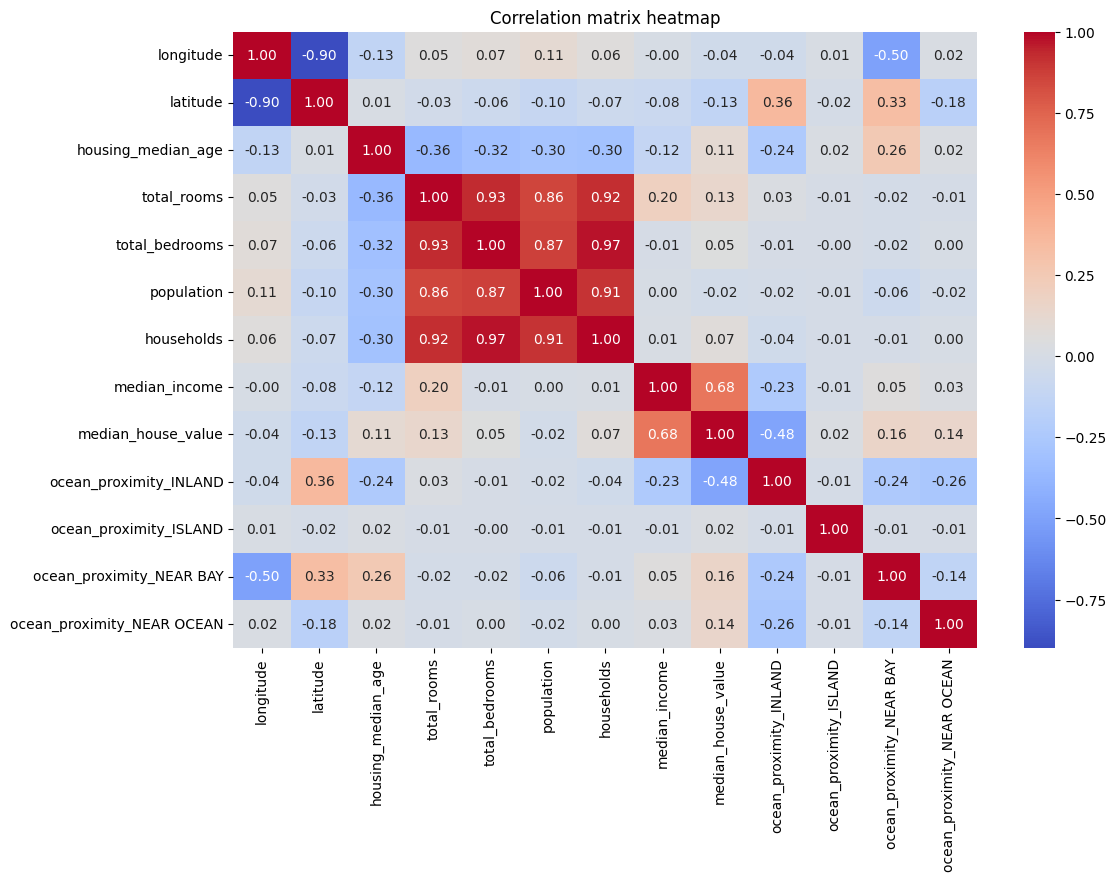

In [131]:
#using the one-hot encoding method to ensure that the the non-integer(ocean_proximity) column values are changed to binary to be used in the model
housing_converted = pd.get_dummies(housing, columns=['ocean_proximity'], drop_first=True)

housing_converted = housing_converted.astype(int)

#variable for correlaation matrix
corr_matrix = housing_converted.corr()


#plotting the heatmap using matplot that is used for plotting graphs
plt.figure(figsize=(12, 8))
#seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix heatmap")
plt.show()

#median house values is correlated with 

In [132]:
#creating a correlation matrix
#creating a table that puts the correlation matrix into a table called corr_matrix 
corr_matrix = housing_converted.corr()
#asking for a specific column in that table
#sort_vlaues functin will sort values in the column and because the highest correlation to be at the top, so have a descending order, so using ascending option and equating it to false 
corr_matrix["median_house_value"].sort_values(ascending=False)
#gives the full correlation table of all pairs of variables in the dataset
#correlation shows how closely related two variables are or how much one variable changes as the other one changes
#correlation of 1 indicates that they are exactly the same.
#correlation ranges between negative one and positive one. - positive 1 correlation means that they are exactly the same. Negative 1 correlation means that they are exactly the opposite.
#correlation of zero means that there is no relationship between the two. So values closer to 1 or negative 1 means that those variables are more closely related.

#OBSERVATIONS from the correlation matrix
#-gives the correlation of the median house value with all the other value variables including itself in descending order.
#-the median_house_value is highly correlated with median_income which makes perfect sense - (rich people, so the houses are more expensive)
#there is also negative correlation - weak correlation between the house prices and latit ude and it is negative - as you move up north, as  latitude increases the prices decrease so there is negative correlation meaning the hosues up north tend to be cheaper than the houses towards the south of california

median_house_value            1.000000
median_income                 0.678402
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.041666
latitude                     -0.134373
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

1. Handling missing values

In [133]:
#dealing with variable for total_bedrooms have missing values    
# 2 options:
#Option 1 - drop the whole feature completely - results in losing a lot of information
#Option 2 - drop every observation with missing value for total number of bedrooms - not optimal but better than the 1st option. rather than losing the whole feature compeletely, it keeps the feature, instead drop the 207 observations from the total of over 20 thousand observations

#DESCISION - drop the 207 observations for which the value of this variable is missing - to achieve this I used the function called dropna
#drop all the observations in which the value for the total number of bedrooms is missing and asking python to put it in a new table which is called housing_na
housing_na = housing.dropna(subset=["total_bedrooms"]) #creating a new dataset called housing_na which has fewer obseravtions, precisely 207 fewer observations.
#all the observations with the missing values for total bedrooms are cleaned from/dropepd from the dataset

#showing the shape of the new dataset
housing_na.shape
#shows that instead of having 20700, now there are only 20433
#Therefore 207 obseravtions are dropped from the dataset

#IMPORTANT - INSTEAD OF DROPPING IT MUST BE FILLED IN

(20640, 10)

In [134]:
#checking if everything was converted successfully 
housing_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   longitude                   20640 non-null  int32
 1   latitude                    20640 non-null  int32
 2   housing_median_age          20640 non-null  int32
 3   total_rooms                 20640 non-null  int32
 4   total_bedrooms              20640 non-null  int32
 5   population                  20640 non-null  int32
 6   households                  20640 non-null  int32
 7   median_income               20640 non-null  int32
 8   median_house_value          20640 non-null  int32
 9   ocean_proximity_INLAND      20640 non-null  int32
 10  ocean_proximity_ISLAND      20640 non-null  int32
 11  ocean_proximity_NEAR BAY    20640 non-null  int32
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int32
dtypes: int32(13)
memory usage: 1.0 MB


In [135]:
#Dealing with the categorical variable

#turn the categorical variable to a series of dummy variables
#for each of the categories within the categorical variable we create one dummy
#dummy is a binary variable - it will either be zero or 1
#for the ocean_proximity variable which is categorical variable with 5 categories, we will create 5 binary variables.
#each binary variable is either going to be 1 or zero depending on the value of the category in the ocean proximity.
#So for example, create one binary variable that is called inland that is going to be 1 only if the district is inland.
#Then another binary variable called Near ocean that is going to be 1 only if the category of ocean proximity is equal to near ocean
#to achieve this use a function called get dummies

#creating the dummies

dummies = pd.concat([housing_na, housing_converted], axis='columns')
#printing dummies
dummies
#successfully shows five dummies that are either 0 or 1 depending on the value in the categorical variable and for the first observation, nearbay is equal to 1 because the value of the ocean_proximity variable was near bay for the first observation
#note that all the dummies will be zero except one of them because there is only one possibility for ocean_proxmity variable for each district.
#it's one of the five choices dipslayed in the output
#the first 5 were near bay, soeveryhtign

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,...,880,129,322,126,8,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,...,7099,1106,2401,1138,8,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,...,1467,190,496,177,7,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,...,1274,235,558,219,5,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,...,1627,280,565,259,3,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,...,1665,374,845,330,1,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,...,697,150,356,114,2,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,...,2254,485,1007,433,1,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,...,1860,409,741,349,1,84700,1,0,0,0


1. Removing outliers

In [136]:
#co,mbing  the previous dataets into second dummy 
dummies2 = pd.concat([housing, housing_converted], axis='columns')
#showing the combined data
dummies2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,...,880,129,322,126,8,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,...,7099,1106,2401,1138,8,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,...,1467,190,496,177,7,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,...,1274,235,558,219,5,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,...,1627,280,565,259,3,342200,0,0,1,0


Essential to drop one of binary variables

In [137]:
#removing the ocean proximity column
housing_cleaned_data = dummies2.drop(['ocean_proximity', 'ocean_proximity_INLAND' ], axis='columns')
housing_cleaned_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,longitude,...,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,-122,...,41,880,129,322,126,8,452600,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,-122,...,21,7099,1106,2401,1138,8,358500,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,-122,...,52,1467,190,496,177,7,352100,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,-122,...,52,1274,235,558,219,5,341300,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,-122,...,52,1627,280,565,259,3,342200,0,1,0


2. Feature Engineering

In [138]:
#dropping median house values
X=housing_cleaned_data.drop(columns=['median_house_value'])
X.head()
#x is every single other feature in the graph

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,-122,37,41,880,129,322,126,8,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,-122,37,21,7099,1106,2401,1138,8,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,-122,37,52,1467,190,496,177,7,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,-122,37,52,1274,235,558,219,5,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,-122,37,52,1627,280,565,259,3,0,1,0


In [139]:
y=housing_cleaned_data['median_house_value']
y.head()

,median_house_value,median_house_value
0,452600,452600
1,358500,358500
2,352100,352100
3,341300,341300
4,342200,342200


Splitting the data into training and testing

In [140]:
from sklearn.model_selection import train_test_split

#splitting the data - 20 percent(0.2 times 100) is trainig, rest 80 percent is testing 

#test for x-ccoordinate

#rrandom_state is used to randomsie the data 
#panda data frames
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=46)

#converting the data frames into numpy arrays using ('to_numpy()')for compatibility reasons
xTrain, xTest, yTrain, yTest = X_training.to_numpy(), X_testing.to_numpy(), y_training.to_numpy(), y_testing.to_numpy(),


Scaling the features

In [141]:
# #scaling the features 

from sklearn.preprocessing import StandardScaler

#scaling the first 8 columns of data
scaling = StandardScaler().fit(xTrain[:, :8])

def pre_preocessFunction(X):
    #make a copy of the pre-proccessed data and store it into x
    x_data = np.copy(X)
    x_data[:, :8] = scaling.transform (x_data[:, :8])
    return x_data

#creating two new scaled variables to store the scaled
#scaling the x data
xTrainingScaled, xTestingScaled = pre_preocessFunction(xTrain), pre_preocessFunction(xTest)

3 and 4. Model Selection/Model Implementation and Baseline Comparison

Following is linear regression:

In [142]:
# code for linear regression

#importing Ordinary Least Squares regression model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(xTrainingScaled, y_training)

LinearRegression()

Following is random forest forest regression:

In [143]:
# code for randomforestRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

#the fit for random forest regresssor to traning data
RandomForestRegression = RandomForestRegressor(max_depth=25).fit(xTrainingScaled, yTrain)

#predict on training data and calculate the RMSE - using the x trained data and y trained data and comparing it to the x and y testing data 
trainedMSE = MSE(RandomForestRegression.predict(xTrainingScaled), yTrain, squared=False)
testMSE = MSE(RandomForestRegression.predict(xTestingScaled), yTest, squared=False)

print("MSE for training is: "+str(trainedMSE))
print("MSE for testing is: "+str(testMSE))



#MSE is model's predictions 
#mean squared error is diplayed - the value printed on left is train and the value printed on the right is testing 
#the lower the MSE the better - shows that the model's predictions are closer to actual values, showing that it is a better fit. higer means bad fit

MSE for training is: 18609.129348590046
MSE for testing is: 49743.00594291354


Random forest - training and testing

In [144]:
#r-squared score for random forest training 
TrainedRandomForest = print("R-squared Score for random forest training is:"+str(RandomForestRegression.score(xTrainingScaled, yTrain)))
#r-squared score for random forest testing 
TestRandomForest = print("R-squared Score for random forest testing is:"+str(RandomForestRegression.score(xTestingScaled, yTest)))

TrainedRandomForest, TestRandomForest

R-squared Score for random forest training is:0.9739220649392074
R-squared Score for random forest testing is:0.8161620557826094


(None, None)